# Proyek Analisis Data: Nama dataset
- Nama:Davit Hidayat
- Email:davit.hidayat28@gmail.com
- Id Dicoding:davithidayat

## Menentukan Pertanyaan Bisnis
- pertanyaan 1: Metode Pembayaran apa yang sering digunakan?
- pertanyaan 2: Dari State mana saja customer berasal?

## Menyiapkan semua library yang dibutuhkan


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import streamlit as st


## Data Wrangling
####  Gathering Data

In [7]:
order_payments = pd.read_csv("order_payments_dataset.csv")
customers_loc = pd.read_csv("customers_dataset.csv")
customers_loc.head(10)



customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   
5  879864dab9bc3047522c92c82e1212b8  4c93744516667ad3b8f1fb645a3116a4   
6  fd826e7cf63160e536e0908c76c3f441  addec96d2e059c80c30fe6871d30d177   
7  5e274e7a0c3809e14aba7ad5aae0d407  57b2a98a409812fe9618067b6b8ebe4f   
8  5adf08e34b2e993982a47070956c5c65  1175e95fb47ddff9de6b2b06188f7e0d   
9  4b7139f34592b3a31687243a302fa75b  9afe194fb833f79e300e37e580171f22   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP  
5                     89254         jaragua do sul             SC  
6                      4534              sao paulo             SP  
7                     35182                timoteo             MG  
8                     81560               curitiba             PR  
9                     30575         belo horizonte             MG

#### Assessing Data & Cleaning Data

In [ ]:
import pandas as pd

#Data 1
order_payments = pd.read_csv("order_payments_dataset.csv")
order_payments = order_payments.drop(columns = ["payment_installments", "payment_value", "payment_sequential"])
order_payments = order_payments.dropna()
order_payments = order_payments.drop(order_payments[order_payments['payment_type'] == 'not_defined'].index)


In [ ]:
#Data 2
customers_loc = pd.read_csv("customers_dataset.csv")
customers_loc = customers_loc.drop(columns = ["customer_zip_code_prefix", "customer_unique_id"])
customers_loc = customers_loc.dropna()
customers_loc.head(9)

## Exploratory Data Analysis (EDA)
### Explore ...

## Visualization & Explanatory Analysis

Apa strategi marketing efektif yang dapat dilakukan oleh perusahaan untuk marketing di bulan depan pada puncak 12.12?
Apa strategi secara online dan juga strategi secara offline yang dapat dilakukan oleh perusahaan?
Darimana sajakah customer yang membeli product dari perusahaan?

In [8]:
#deskripsi data dari order payment dataset
order_payments.describe(include="all")
#dari data dibwaah ini kita dapat liat bahwa terjadi transaksi pembayaran sebanyak 103.886 kali

order_id  payment_sequential payment_type  \
count                             103886       103886.000000       103886   
unique                             99440                 NaN            5   
top     fa65dad1b0e818e3ccc5cb0e39231352                 NaN  credit_card   
freq                                  29                 NaN        76795   
mean                                 NaN            1.092679          NaN   
std                                  NaN            0.706584          NaN   
min                                  NaN            1.000000          NaN   
25%                                  NaN            1.000000          NaN   
50%                                  NaN            1.000000          NaN   
75%                                  NaN            1.000000          NaN   
max                                  NaN           29.000000          NaN   

        payment_installments  payment_value  
count          103886.000000  103886.000000  
unique                   NaN            NaN  
top                      NaN            NaN  
freq                     NaN            NaN  
mean                2.853349     154.100380  
std                 2.687051     217.494064  
min                 0.000000       0.000000  
25%                 1.000000      56.790000  
50%                 1.000000     100.000000  
75%                 4.000000     171.837500  
max                24.000000   13664.080000

In [4]:
# deskripsi data dari customer dataset
customers_loc.describe(include="all")
#dari dataset dibawah ini dapat dilihat bahwa terdapat 99.441 customer yang melakukan pembelian dan top atau paling banyak
#berasal dari SP sau Paulo.

customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top     06b8999e2fba1a1fbc88172c00ba8bc7  8d50f5eadf50201ccdcedfb9e2ac8455   
freq                                   1                                17   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

        customer_zip_code_prefix customer_city customer_state  
count               99441.000000         99441          99441  
unique                       NaN          4119             27  
top                          NaN     sao paulo             SP  
freq                         NaN         15540          41746  
mean                35137.474583           NaN            NaN  
std                 29797.938996           NaN            NaN  
min                  1003.000000           NaN            NaN  
25%                 11347.000000           NaN            NaN  
50%                 24416.000000           NaN            NaN  
75%                 58900.000000           NaN            NaN  
max                 99990.000000           NaN            NaN

In [17]:
order_payments.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)
#dari data mengenai order dibawah ini, dapat dilihat bahwa penggunaan credit card dalam melakukan transaksi pembayaran yang
#dilakukan oleh customer melebihi 50% dari total keseluruhan payment yang ada dengan 76505 kali transaksi.

payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
not_defined        3
Name: order_id, dtype: int64

In [16]:
customers_loc.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)
#dari data dibawah ini dapat dilihat bahwa customer yang berasal dari Sao Paulo sebanyak 15540 sangat jauh mendominasi
#dibandingkan daerah lainnya seperti Rio de Janeiro, Bel0 horizonte, dan lainnya

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

### Pertanyaan 1: Metode Pembayaran apa yang sering digunakan?

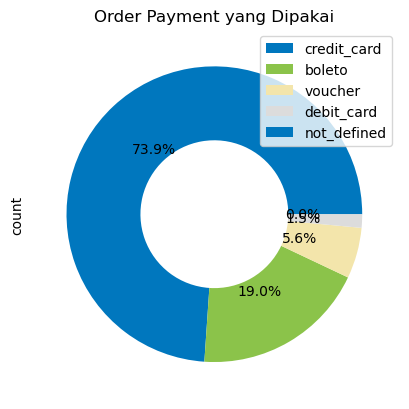

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

order_payments = pd.read_csv("order_payments_dataset.csv")
colors = ['#0077be', '#8bc34a', '#f3e5ab', '#dcdcdc']
order_payments['payment_type'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=None, colors=colors, wedgeprops=dict(width=0.5))
plt.legend(labels=order_payments['payment_type'].value_counts().index, loc="best")
plt.title('Order Payment yang Dipakai')
plt.show()

### Pertanyaan 2: Dari State mana saja customer berasal?

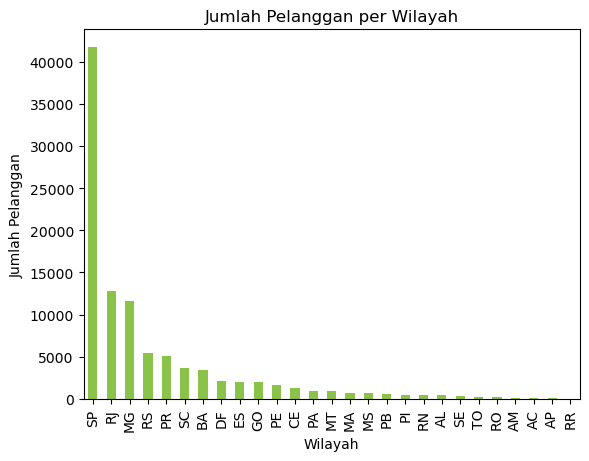

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

customers_loc = pd.read_csv("customers_dataset.csv")
colors = ['#8bc34a']
customers_loc['customer_state'].value_counts().plot(kind='bar', color=colors)
plt.title('Jumlah Pelanggan per Wilayah')
plt.xlabel('Wilayah')
plt.ylabel('Jumlah Pelanggan')
plt.show()

## Conclusion

- Conclution pertanyaan 1

Dapat dilihat dari hasil penyajian data mengenai metode pembayaran yang digunakan oleh customer pada chart di atas. Bahwa lebih dari setengahnya atau lebih tepatnya 73,9% menggunakan metode pembayaran kartu kredit, atau Credit Card. metode kedua yang digunakan yaitu Boleto dengan persentase 19%, lalu disusul oleh voucher 5.6% dan terakhir debit card yang hanya menyumbang 1.5% dari metode pembayaran yang dipakai.

Data ini dapat digunakan untuk memberikan rencana marketing berupa rewards atau discount kepada para customers yang menggunakan
kartu credit agar dapat membelanjakan lebih banyak uangnya lagi di toko kita.

- Conclution pertanyaan 2

Dari data yang telah didapatkan, dapat disimpulkan bahwa customers yang paling banyak melakukan pembelian adalah customers yang
berasal dari state SP. lebih dari setengah orang yang melakukan pembelian atau melakukan pembelian ulang di perusahaan kita
itu berasal dari wilayah SP.
sebanyak 40.000 lebih atau tepatnya 42.017 produk kita terkirim ke wilayah SP tersebut. Hal ini bisa menjadi pertimbangan
perusahaan untuk melakukan sebuah campaign offline atau marketing offline di wilayah tersebut guna membuat pelanggan-pelanggan
tersebut lebih royal lagi untuk membeli produk dari perusahaan dan untuk menarik lebih banyak lagi calon-calon pelanggan
baru.